In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import sys
print(sys.executable)


c:\Users\DONATUS\anaconda24\python.exe


In [3]:
#Data Collection
df = pd.read_csv('winequality.csv')

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Number of rows and columns
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#finding the statistical measures
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


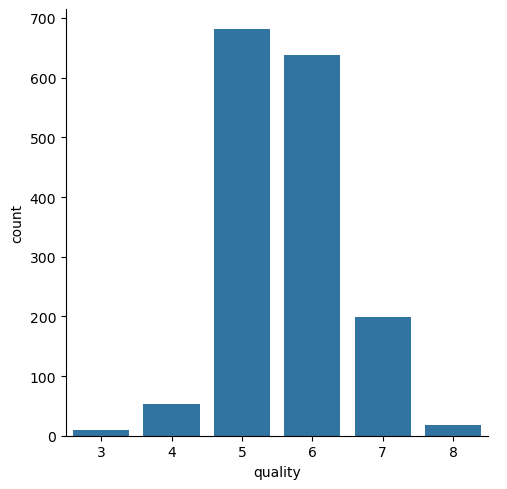

In [9]:
#number of values for each quality
sns.catplot(data = df, x='quality', kind='count');

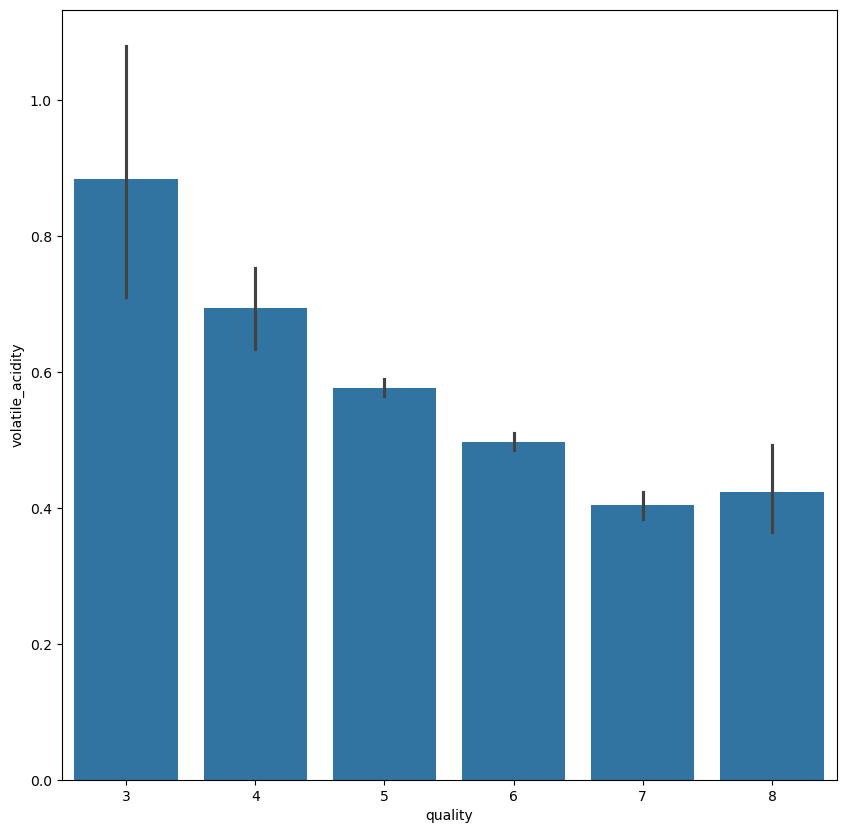

In [10]:
#volatilie acidity vs Quality 
plot = plt.figure(figsize=(10,10))
sns.barplot(data=df, x='quality', y='volatile_acidity');

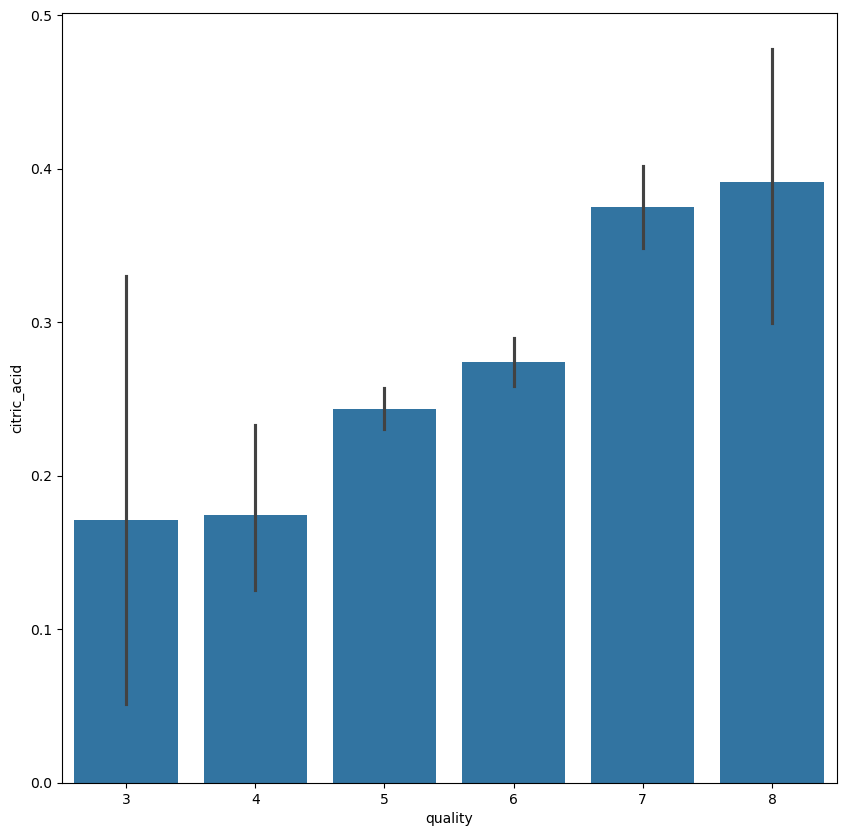

In [11]:
#volatilie acidity vs Quality 
plot = plt.figure(figsize=(10,10))
sns.barplot(data=df, x='quality', y='citric_acid');

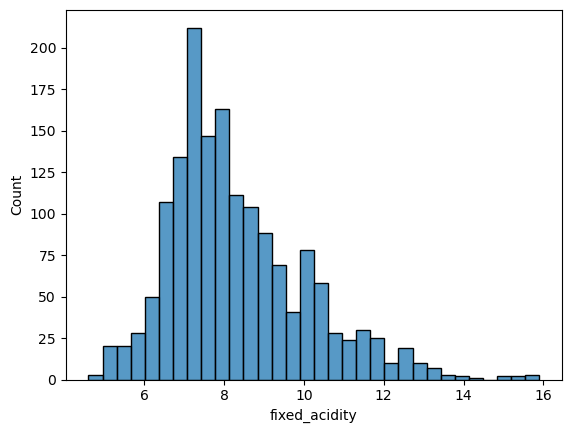

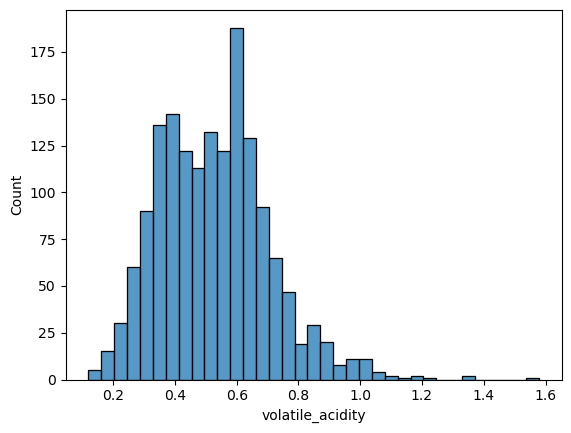

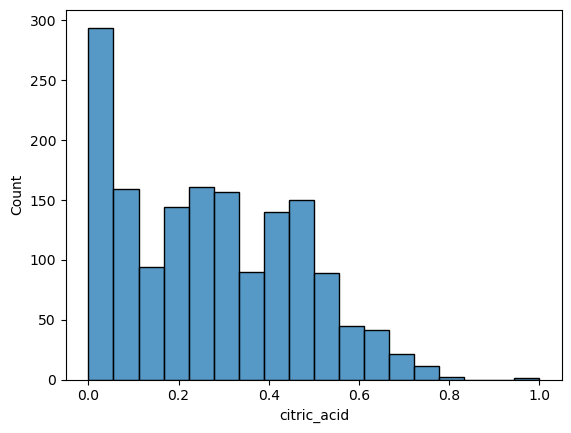

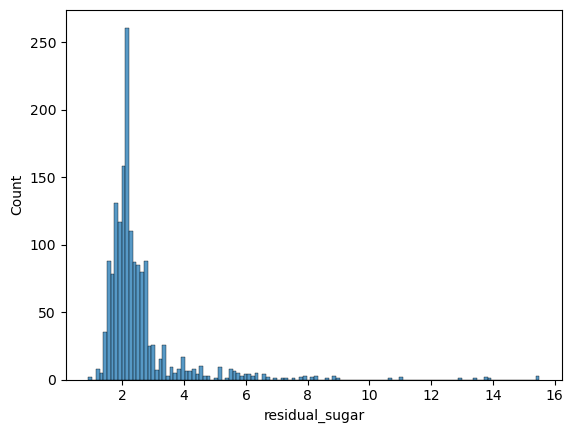

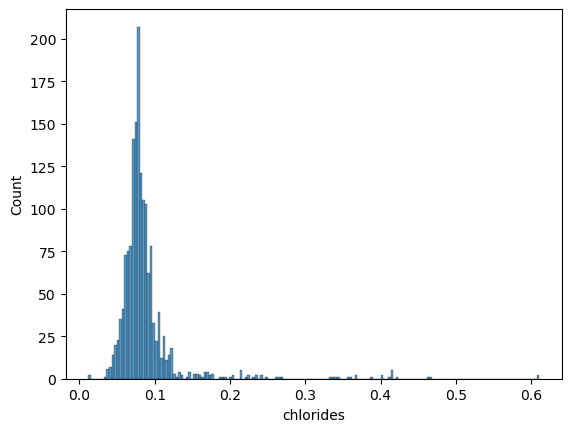

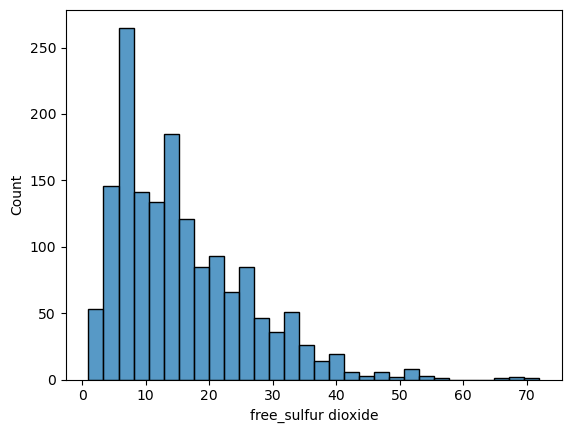

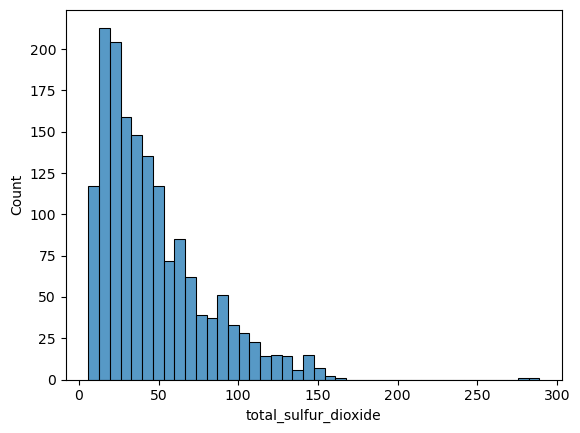

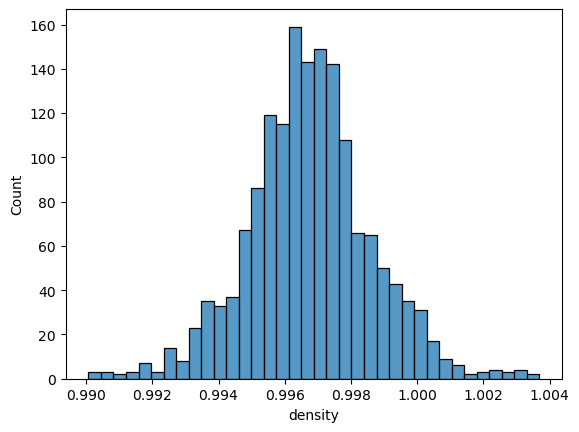

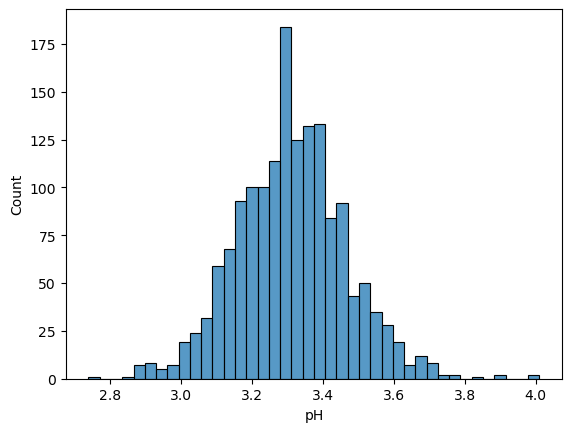

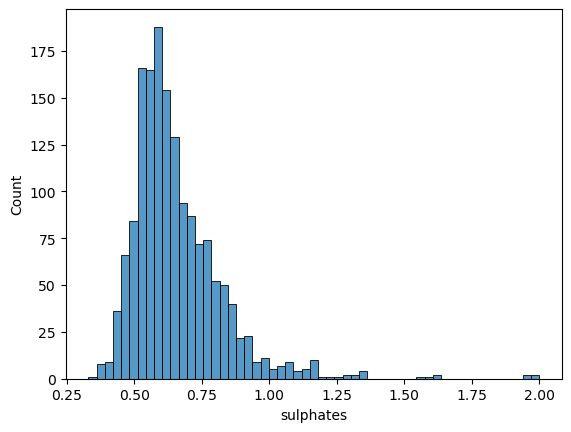

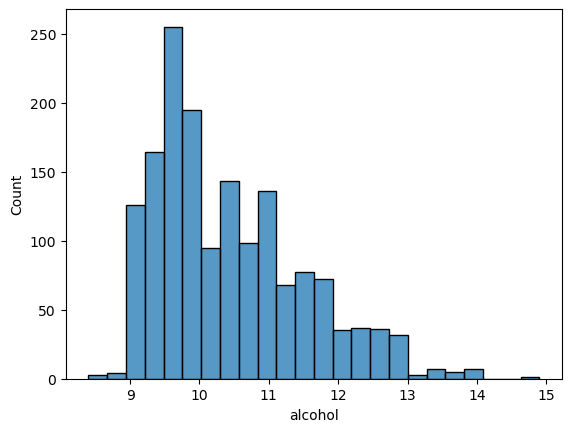

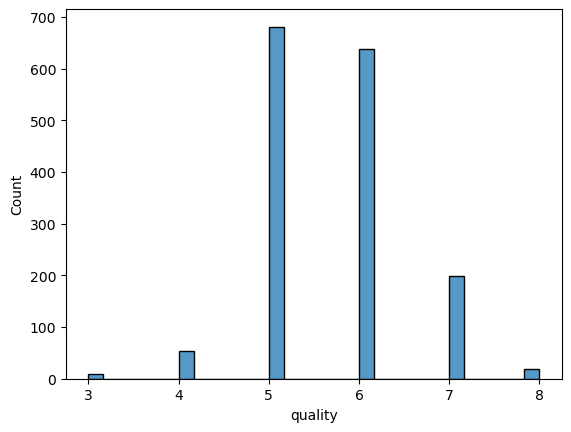

In [12]:
for i in df:
    plt.figure()
    sns.histplot(df[i])

In [13]:
report = sv.analyze(df)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: >

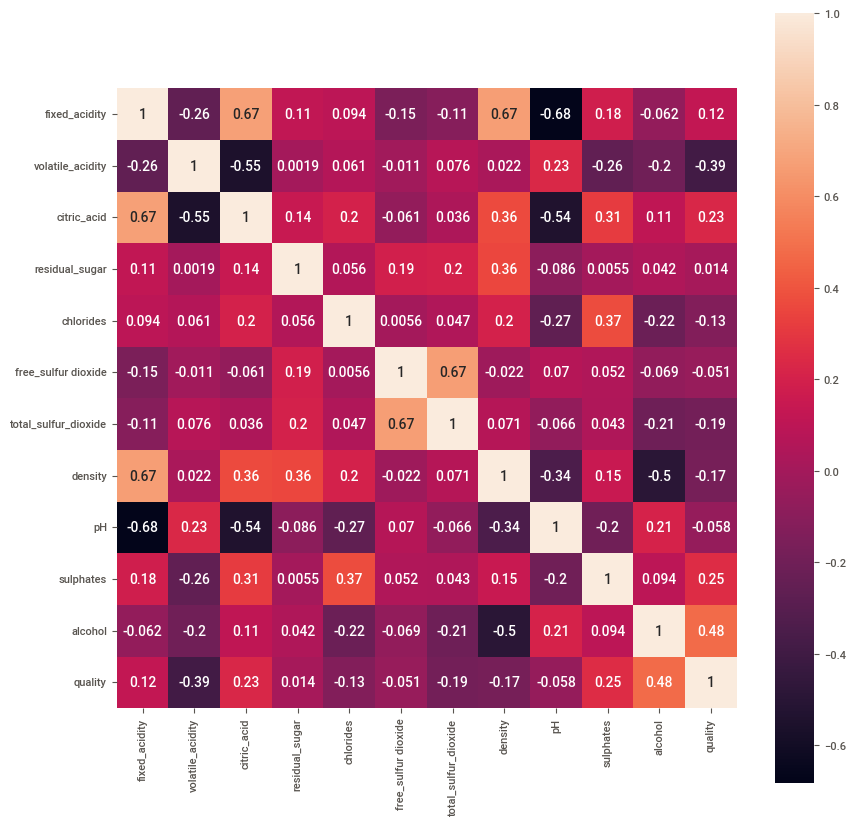

In [14]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, annot = True)

<Axes: >

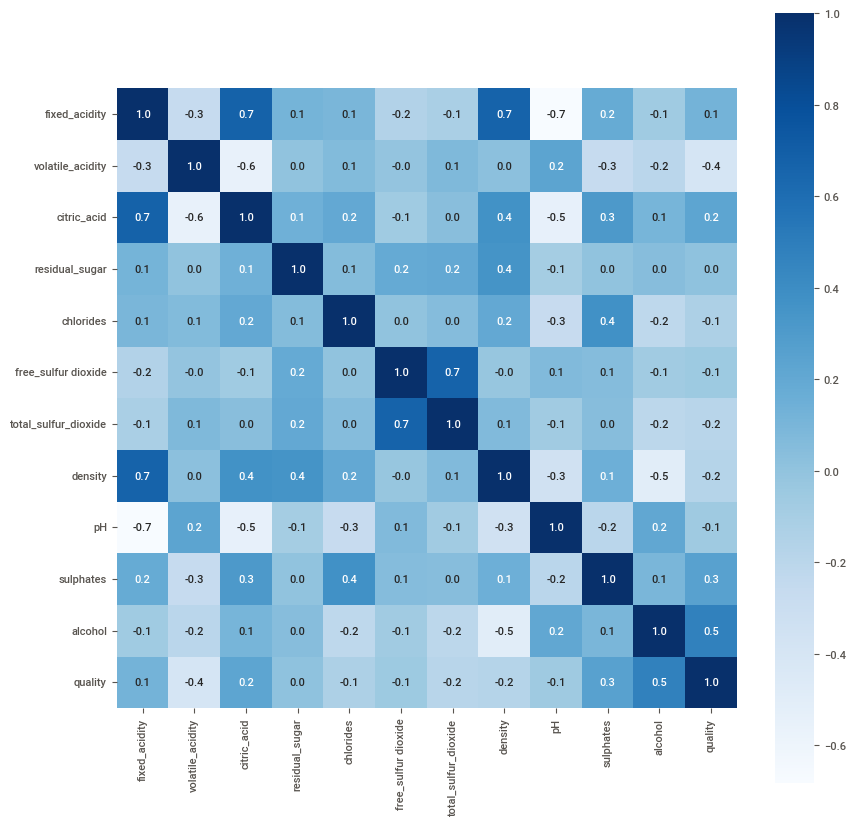

In [15]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap='Blues')

In [16]:
corr = df.corr()

In [17]:
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [18]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
#seperate the data and the label
x = df.drop('quality', axis = 1)

In [20]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [21]:
#creating a benchmark for the binary
y = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [23]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =2)

In [24]:
x_train.shape, x_test.shape,

((1279, 11), (320, 11))

In [25]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
468,11.4,0.36,0.69,2.1,0.090,6.0,21.0,1.00000,3.17,0.62,9.2
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
372,9.1,0.28,0.48,1.8,0.067,26.0,46.0,0.99670,3.32,1.04,10.6
748,7.2,0.50,0.18,2.1,0.071,12.0,31.0,0.99761,3.52,0.72,9.6
1207,9.9,0.72,0.55,1.7,0.136,24.0,52.0,0.99752,3.35,0.94,10.0
...,...,...,...,...,...,...,...,...,...,...,...
299,6.9,0.67,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,0.71,9.6
1558,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5
493,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
527,7.0,0.38,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4


In [27]:
x_train_scaled

array([[ 1.7881859 , -0.93498764,  2.17232524, ..., -0.90734875,
        -0.22075786, -1.13074986],
       [-1.4130646 ,  0.12667321, -0.88873382, ...,  1.37941326,
         0.57990859,  0.76207561],
       [ 0.44948115, -1.38200274,  1.08279574, ...,  0.07269211,
         2.1812415 ,  0.19422797],
       ...,
       [ 0.21666293,  0.90894963,  0.20079567, ...,  1.11806903,
         0.46552767,  1.1406407 ],
       [-0.7728145 , -0.82323387,  1.1346781 , ...,  0.53004451,
         0.63709905,  0.95135816],
       [-0.65640539, -1.5496334 ,  0.51208982, ...,  1.37941326,
         0.80867044,  1.89777089]])

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  #to standardized the data to a common range between 0 & 1
#Model Training 
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
#Model Evaluation
xtest_scaled_prediction= model.predict(x_test_scaled)
test_data_accuracy = accuracy_score(xtest_scaled_prediction, y_test)

In [32]:
print(test_data_accuracy)

0.8875


In [33]:
#Model Evaluation
xtrain_scaled_prediction= model.predict(x_train_scaled)
train_data_accuracy = accuracy_score(xtrain_scaled_prediction, y_train)

In [34]:
print(train_data_accuracy)

0.8795934323690383


In [35]:
#Building a predictive system
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)


#Changing the input data to numpy arrray since the processing is more efficient
input_data_as_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
input_data_reshape = input_data_as_numpy.reshape(1, -1)

#standardizing the input_data
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = model.predict(input_data_reshape)
print(prediction)

if prediction[0]==1:
    print("Good quality wine.")
else:
    print('Bad quality wine')

[[-0.48179173 -0.15271123  0.46020746  2.58410934 -0.34599406  0.11210377
   1.7240887   0.54794787  0.26870028  0.80867044  0.09958669]]
[0]
Bad quality wine


In [36]:
#Building a predictive system
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#Changing the input data to numpy arrray since the processing is more efficient
input_data_as_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
input_data_reshape = input_data_as_numpy.reshape(1, -1)

#standardizing the input_data
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = model.predict(input_data_reshape)
print(prediction)

if prediction[0]==1:
    print("Good quality wine.")
else:
    print('Bad quality wine') 

[[-0.59820084  0.68544208 -1.40755739 -0.96848831 -0.46971999 -0.08087163
  -0.79214886 -1.16817081  0.53004451 -1.07861478 -0.37361968]]
[1]
Good quality wine.


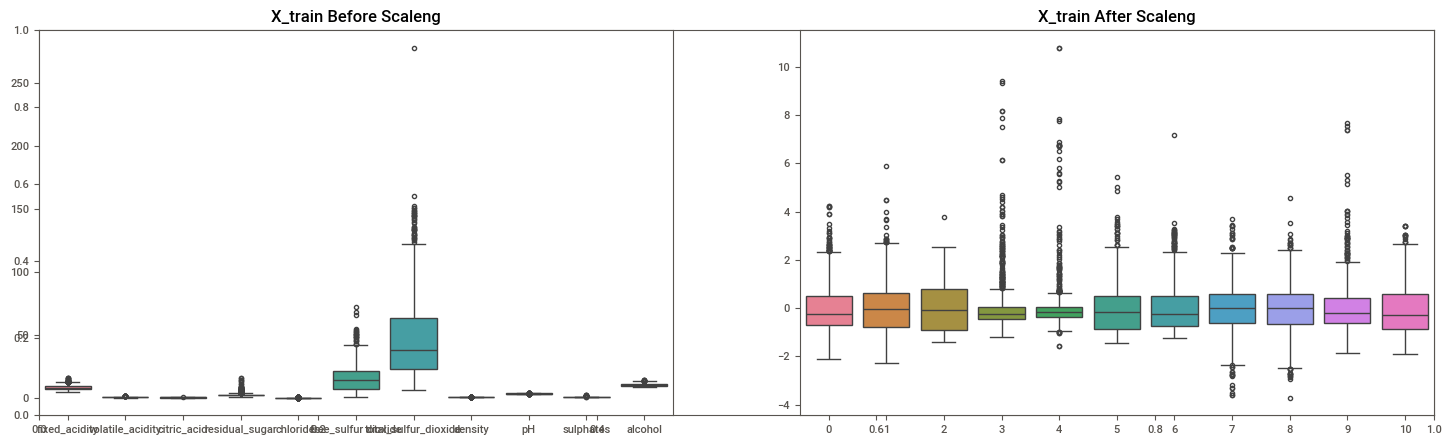

In [37]:
plt.subplots(figsize = (18, 5)) 
plt.subplot(1, 2, 1)
sns.boxplot(data = x_train)
plt.title('X_train Before Scaleng')

plt.subplot(1, 2, 2)
sns.boxplot(data = x_train_scaled)
plt.title('X_train After Scaleng')
plt.show()


In [38]:
#Pickle the machine learnig model and the model standard scaler

In [39]:
scaler

StandardScaler()

In [40]:
model

LogisticRegression()

In [41]:
import pickle

In [42]:
#creating a variable to saved the  the trained model
filename = 'wine_model.sav'
standard_scaler = 'scaler.sav'

In [43]:
pickle.dump(model,open('wine_model.sav','wb'))
pickle.dump(scaler,open('scaler.sav', 'wb'))


In [44]:
#loading the saved model 
loaded_model = pickle.load(open('wine_model.sav', 'rb'))
standard_scaler = pickle.load(open('scaler.sav', 'rb'))


In [45]:
#Building a predictive system
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#Changing the input data to numpy arrray since the processing is more efficient
input_data_as_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
input_data_reshape = input_data_as_numpy.reshape(1, -1)

#standardizing the input_data
std_data = standard_scaler.transform(input_data_reshape)
print(std_data)

prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if prediction[0]==1:
    print("Good quality wine.")
else:
    print('Bad quality wine') 

[[-0.59820084  0.68544208 -1.40755739 -0.96848831 -0.46971999 -0.08087163
  -0.79214886 -1.16817081  0.53004451 -1.07861478 -0.37361968]]
[1]
Good quality wine.


In [46]:
#Building a predictive system
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)


#Changing the input data to numpy arrray since the processing is more efficient
input_data_as_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
input_data_reshape = input_data_as_numpy.reshape(1, -1)

#standardizing the input_data
std_data = standard_scaler.transform(input_data_reshape)
print(std_data)

prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if prediction[0]==1:
    print("Good quality wine.")
else:
    print('Bad quality wine')

[[-0.48179173 -0.15271123  0.46020746  2.58410934 -0.34599406  0.11210377
   1.7240887   0.54794787  0.26870028  0.80867044  0.09958669]]
[0]
Bad quality wine


In [47]:
pip show streamlit

Note: you may need to restart the kernel to use updated packages.


In [48]:
#!streamlit run wines.py

In [49]:
!streamlit run app.py

'streamlit' is not recognized as an internal or external command,
operable program or batch file.
